In [58]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

#Image Thresholding

In [59]:
threshold = 235 #低於235變黑，高於235變白

img = cv2.imread('/content/CT.jpg',0) #讀取圖片
ret,thresh_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY) #0~234全黑，235~255全白

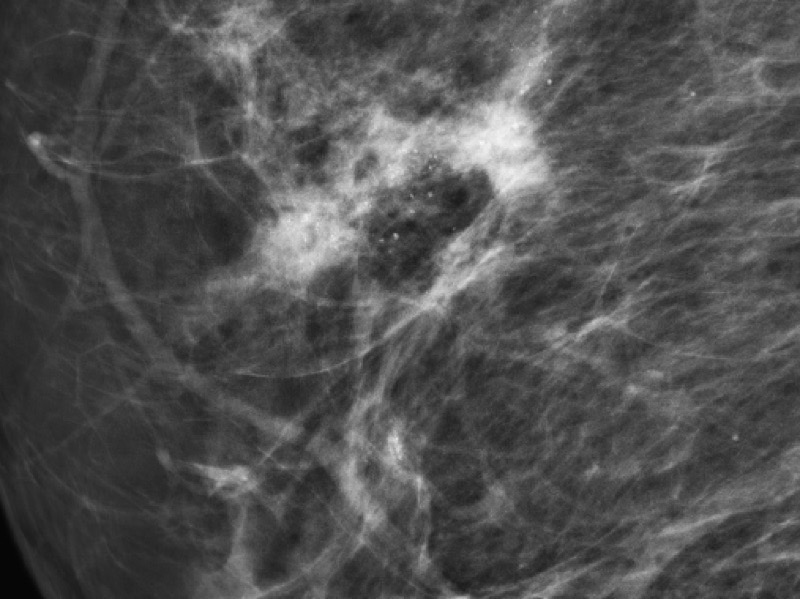

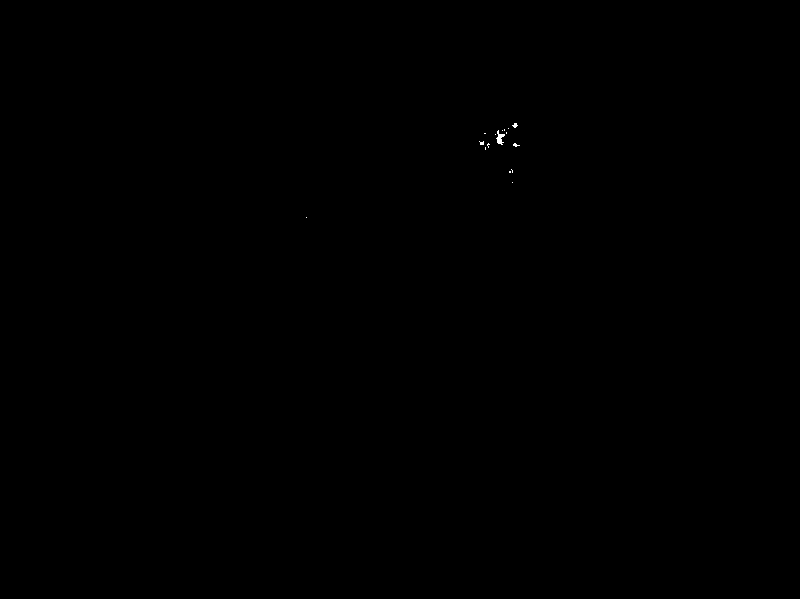

In [60]:
#原始圖片
display(Image.fromarray(img))

#Gamma圖片
display(Image.fromarray(thresh_img))

#Gabor filter

In [61]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 100
    ksize = 35  # The local area to evaluate
    sigma = 3.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [62]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

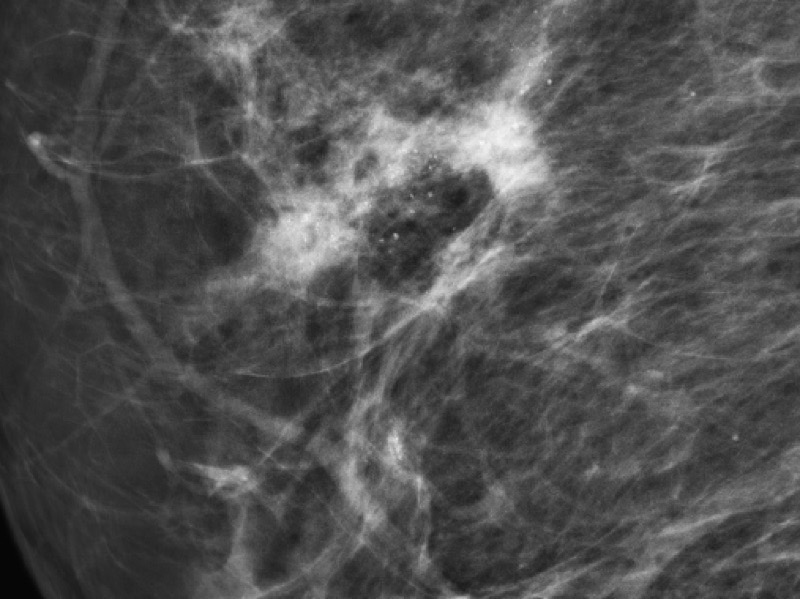

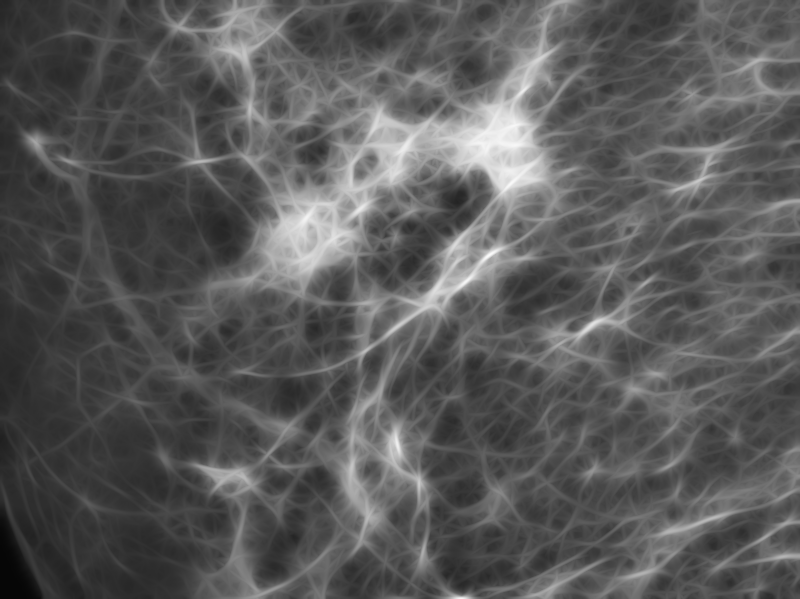

In [63]:
#原始圖片
display(Image.fromarray(img))

#Gabor filter圖片
gfilters = create_gaborfilter()
image_g = apply_filter(img, gfilters)
display(Image.fromarray(image_g))